<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice/blob/main/02_braki_danych_%E2%8F%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from pandas.plotting import register_matplotlib_converters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
register_matplotlib_converters()
sns.set()

In [7]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2024 09:00', end='01-01-2024 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2024-01-01 09:00:00,108.0
2024-01-01 10:00:00,109.0
2024-01-01 11:00:00,110.0
2024-01-01 12:00:00,110.0
2024-01-01 13:00:00,109.0
2024-01-01 14:00:00,NaN
2024-01-01 15:00:00,NaN
2024-01-01 16:00:00,112.0
2024-01-01 17:00:00,111.0
2024-01-01 18:00:00,111.0


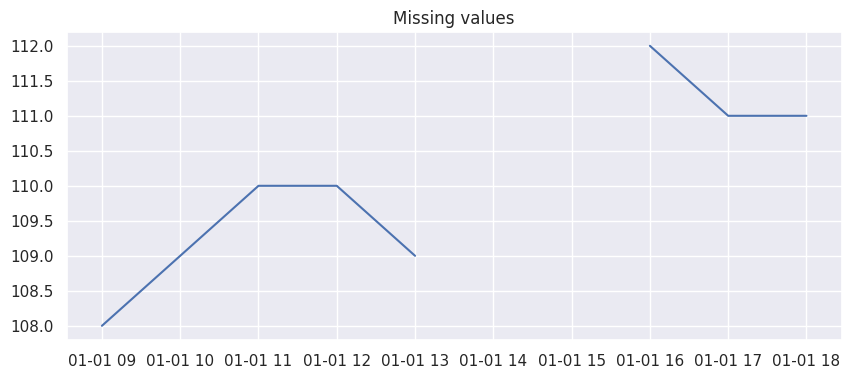

In [23]:
plt.figure(figsize=(10, 4))
plt.title('Missing values')
_ = plt.plot(df.price)

In [24]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Time Series - missing values')

In [25]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Time Series - missing values-values removed')

In [32]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Time Series - missing values - 0 inserted')

In [35]:
df_plotly = df.reset_index()
df_plotly['price_mean'] = df_plotly['price'].fillna(df['price'].mean())  # 👈👈👈👈
px.line(df_plotly, 'index', 'price_mean', width=600, height=400, title='Time Series - missing values - mean')

In [36]:
df_plotly = df.reset_index()
df_plotly['price_mean'] = df_plotly['price'].interpolate()   # 👈👈👈👈
px.line(df_plotly, 'index', 'price_mean', width=600, height=400, title='Time Series - missing values - interpolate')

In [37]:
df_plotly = df.reset_index()
df_plotly['price_mean'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_mean', width=600, height=400, title='Time Series - missing values - forward fill')

In [38]:
df_plotly = df.reset_index()
df_plotly['price_mean'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_mean', width=600, height=400, title='Time Series - missing values - backward fill')